# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

# Read DataSet

In [2]:
df=pd.read_csv('Housing_data.csv')

In [3]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
df.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
df.shape

(506, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283587,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702126,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.207999,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Visualizing Dataset 


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

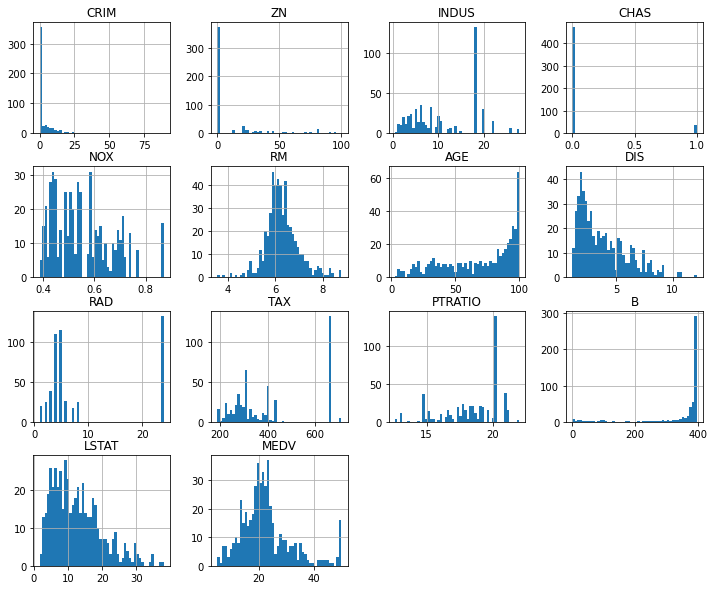

In [8]:
df.hist(bins=50,figsize=(12,10))

<AxesSubplot:>

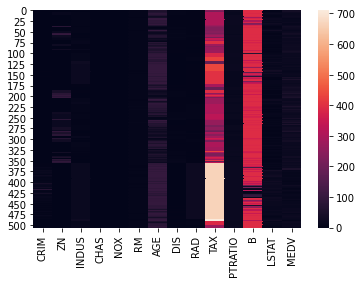

In [9]:
sns.heatmap(df)

<AxesSubplot:ylabel='Count'>

C:\Users\Aniket\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


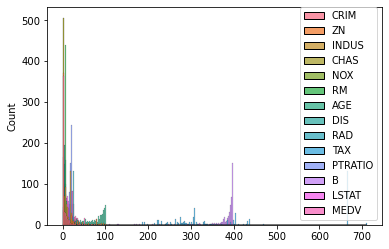

In [10]:
sns.histplot(df)

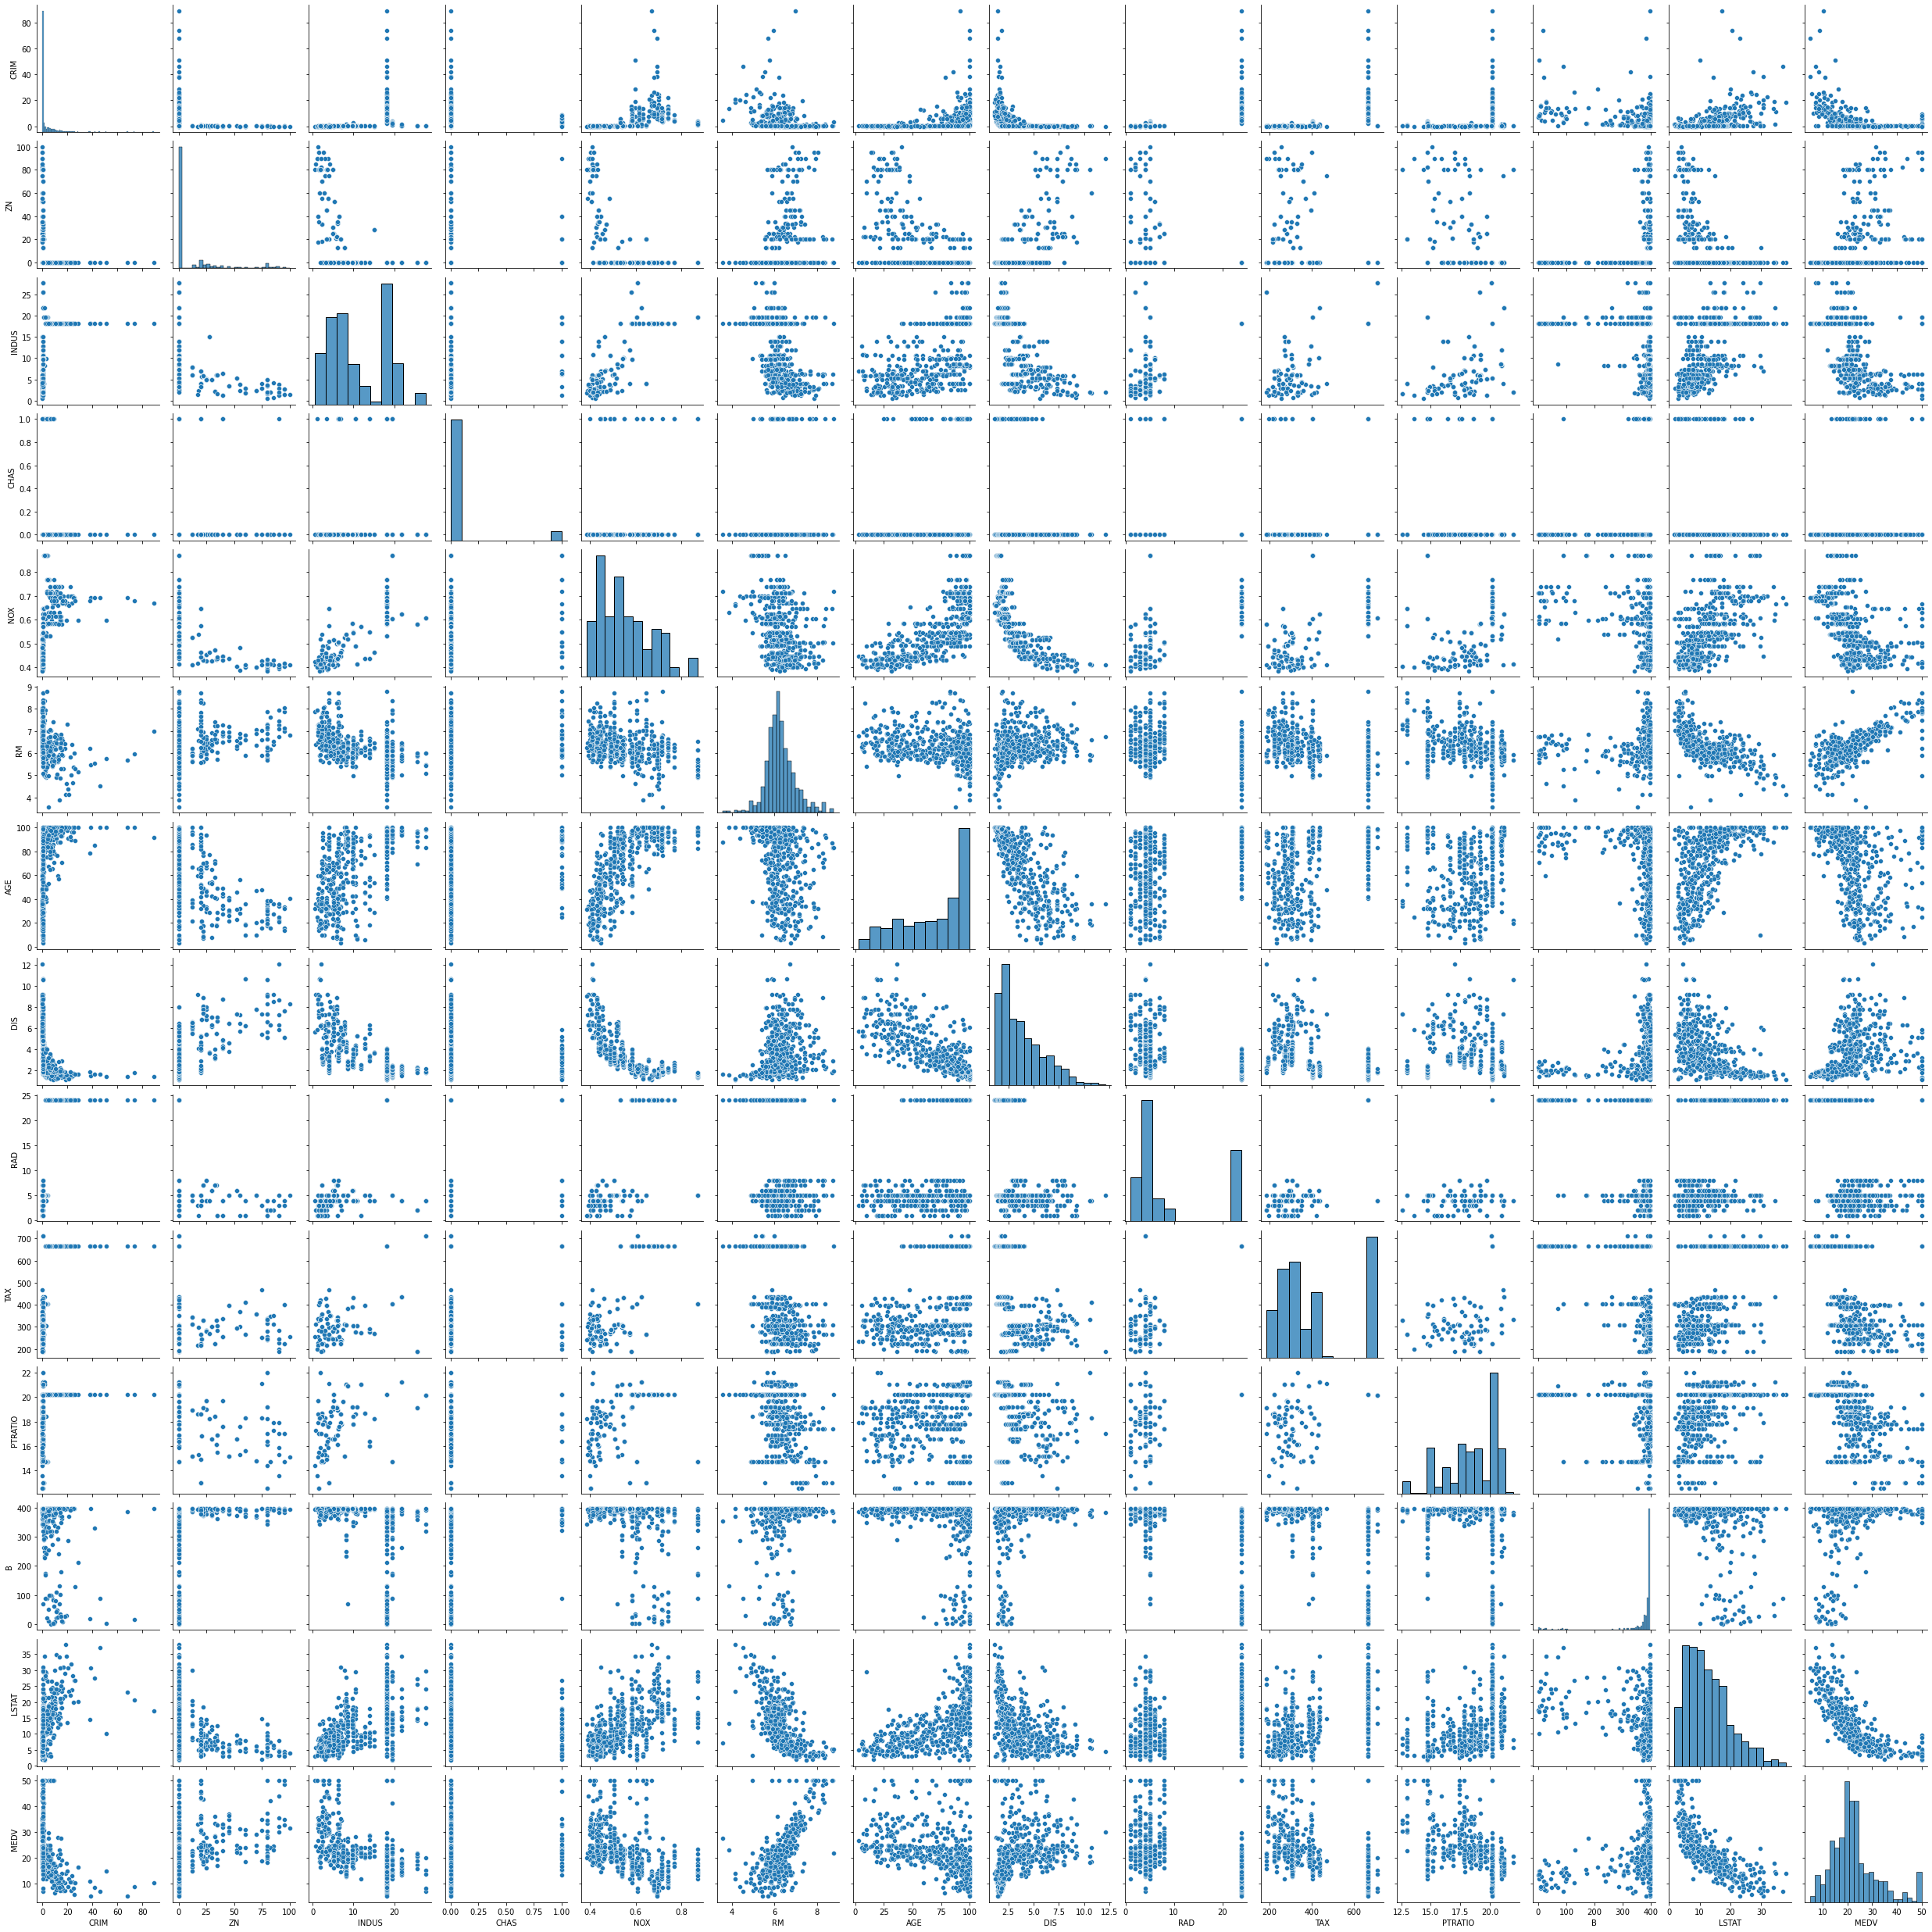

In [11]:
sns.pairplot(df)

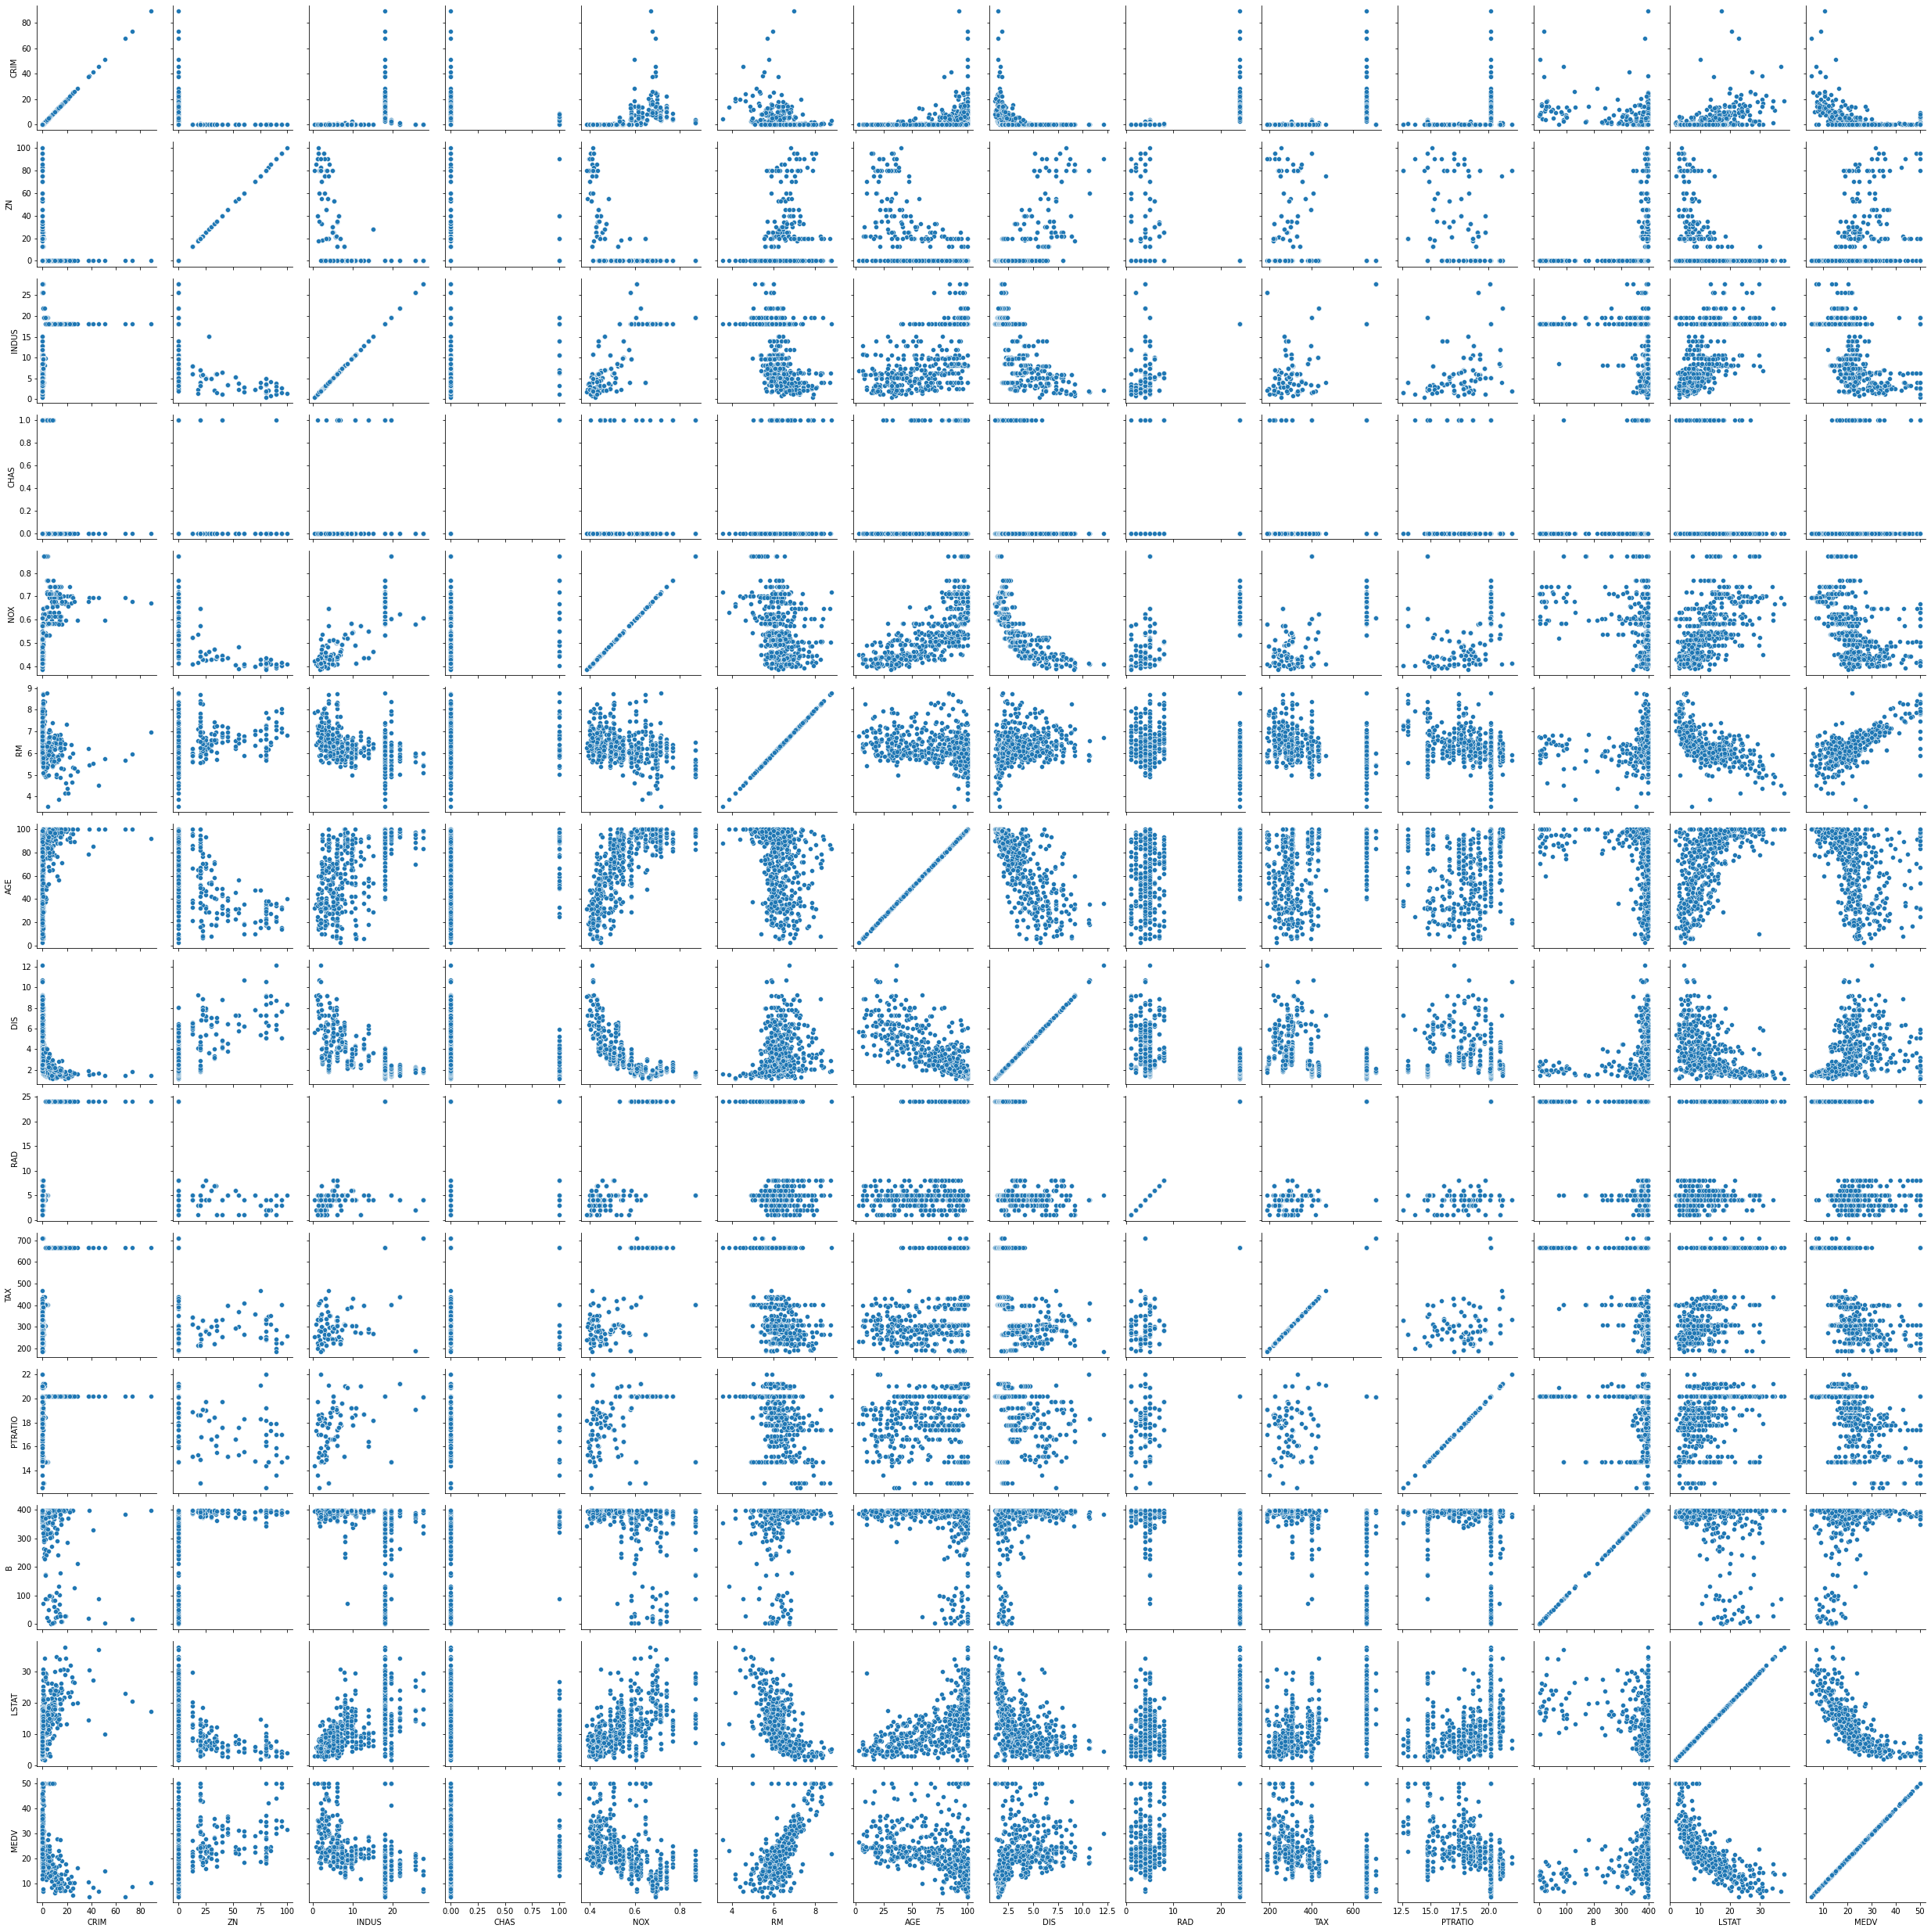

In [12]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

# Correlation Between Features with Target

In [13]:
corr_matrix=df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695668
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

# Select Features For Training Model

In [14]:
df=df[['RM','ZN','B','DIS','CHAS','AGE','CRIM','NOX','TAX','PTRATIO','LSTAT','MEDV']]

# Spilt Data In Training And Testing Set

In [15]:
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

In [16]:
print(f'Rows of training set is {len(train_set)}\nRows of testing set is {len(test_set)}')
print("")
print(f'shapes of training set is {train_set.shape}\nshapes of testing set is {test_set.shape}')

Rows of training set is 404
Rows of testing set is 102

shapes of training set is (404, 12)
shapes of testing set is (102, 12)


# Visualizing Selected Features

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='B', ylabel='RM'>,
        <AxesSubplot:xlabel='DIS', ylabel='RM'>,
        <AxesSubplot:xlabel='CHAS', ylabel='RM'>,
        <AxesSubplot:xlabel='AGE', ylabel='RM'>,
        <AxesSubplot:xlabel='CRIM', ylabel='RM'>,
        <AxesSubplot:xlabel='NOX', ylabel='RM'>,
        <AxesSubplot:xlabel='TAX', ylabel='RM'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='B', ylabel='ZN'>,
        <AxesSubplot:xlabel='DIS', ylabel='ZN'>,
        <AxesSubplot:xlabel='CHAS', ylabel='ZN'>,
        <AxesSubplot:xlabel='AGE', ylabel='ZN'>,
        <AxesSubplot:xlabel='CRIM', ylabel='ZN'>,
        <AxesSubplot:xlabel='NOX', ylabel='ZN'>,
        <AxesSub

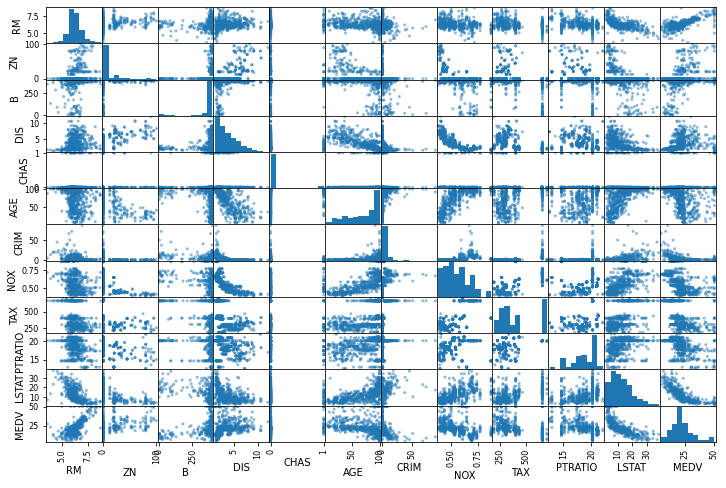

In [17]:
scatter_matrix(df,figsize=(12,8))

# Spilt Data 

In [18]:
x_train=np.array(train_set[['RM','ZN','B','DIS','CHAS','AGE','CRIM','NOX','TAX','PTRATIO','LSTAT']])
y_train=np.array(train_set[['MEDV']])
x_test=np.array(test_set[['RM','ZN','B','DIS','CHAS','AGE','CRIM','NOX','TAX','PTRATIO','LSTAT']])
y_test=np.array(test_set[['MEDV']])

In [19]:
print(f'shape of x_train is {x_train.shape} and rows are {len(x_train)}\nshape of y_train is {y_train.shape} and rows are {len(y_train)}')
print()
print(f'shape of x_train is {x_test.shape} and rows are {len(x_test)}\nshape of y_train is {y_test.shape}rows are {len(y_test)}')

shape of x_train is (404, 11) and rows are 404
shape of y_train is (404, 1) and rows are 404

shape of x_train is (102, 11) and rows are 102
shape of y_train is (102, 1)rows are 102


# LinearRegression

In [20]:
modelLinear=LinearRegression()


In [21]:
modelLinear.fit(x_train,y_train)

LinearRegression()

In [22]:
modelLinear.coef_

array([[ 4.74685030e+00,  2.23548245e-02,  1.16667416e-02,
        -1.41245509e+00,  3.11301875e+00, -9.44573820e-03,
        -8.08287859e-02, -1.57736426e+01,  7.88727937e-04,
        -8.19138726e-01, -4.96438170e-01]])

In [23]:
modelLinear.intercept_

array([24.14381681])

In [24]:
y_predLinear=modelLinear.predict(x_test)

# R2_Score for Linearregression

In [25]:
R_Linear=r2_score(y_test,y_predLinear)

In [26]:
print(f'R2_Score value is {R_Linear}')

R2_Score value is 0.6347901933332245


# MeanSquareError And MeanAbsoluteError for Linear Regression

In [27]:
MSE_Linear=mean_squared_error(y_test,y_predLinear)

In [28]:
print(f'Mean Square Error is {MSE_Linear}')

Mean Square Error is 26.782216770124787


In [29]:
MAE_Linear=mean_absolute_error(y_test,y_predLinear)

In [30]:
print(f'Mean Absolute Error is {MAE_Linear}')

Mean Absolute Error is 3.3922177060814405


# DecisionTreeRegressor

In [31]:
modelTree=DecisionTreeRegressor()

In [32]:
modelTree.fit(x_train,y_train)

DecisionTreeRegressor()

In [33]:
y_predTree=modelTree.predict(x_test)

# R2_Score for DecisionTreeRegression

In [34]:
R_Tree=r2_score(y_test,y_predTree)

In [35]:
print(f'R2_Score value is {R_Tree}')

R2_Score value is 0.8471827555634686


# MeanSquareError And MeanAbsoluteError for DecisionTreeRegressor

In [36]:
MSE_Tree=mean_squared_error(y_test,y_predTree)

In [37]:
print(f'Mean Square Error is {MSE_Tree}')

Mean Square Error is 11.206666666666665


In [38]:
MAE_Tree=mean_absolute_error(y_test,y_predTree)

In [39]:
print(f'Mean Absolute Error is {MAE_Tree}')

Mean Absolute Error is 2.5176470588235293


# RandomForestRegressor

In [40]:
modelEnsemble=RandomForestRegressor()

In [41]:
modelEnsemble.fit(x_train,y_train)

C:\Users\Aniket\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [42]:
y_predEnsemble=modelEnsemble.predict(x_test)

# R2_Score for RandomForestRegressor

In [43]:
R_Ensemble=r2_score(y_test,y_predEnsemble)

In [44]:
print(f'R2_Score value is {R_Ensemble}')

R2_Score value is 0.8789415520650312


# MeanSquareError And MeanAbsoluteError for Random Forest Regressor

In [45]:
MSE_Ensemble=mean_squared_error(y_test,y_predEnsemble)

In [46]:
print(f'Mean Square Error is {MSE_Ensemble}')

Mean Square Error is 8.877673970588242


In [47]:
MAE_Ensemble=mean_absolute_error(y_test,y_predLinear)

In [48]:
print(f'Mean Absolute Error is {MAE_Ensemble}')

Mean Absolute Error is 3.3922177060814405


# Saving The model

In [49]:
from joblib import dump,load

In [50]:
filename_Linear='Price_Prediction_Linear_Regression.sav'
dump(modelLinear,filename_Linear)

['Price_Prediction_Linear_Regression.sav']

In [51]:
filename_Tree='Price_Prediction_DecisionTreeRegression.sav'
dump(modelTree,filename_Tree)

['Price_Prediction_DecisionTreeRegression.sav']

In [52]:
filename_Ensemble='Price_Prediction_RandomForestRegressor.sav'
dump(modelTree,filename_Ensemble)

['Price_Prediction_RandomForestRegressor.sav']